In [1]:
!pip install ipython-sql
import pandas as pd
import seaborn as sns 

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sqlalchemy import create_engine
%load_ext sql

engine = create_engine('sqlite:///starbucks.db')
connection = engine.connect()

You should consider upgrading via the 'c:\users\aconnolly\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
connection.execute('drop table if exists starbucks_nutrition')

In [25]:
df = pd.read_csv('starbucks_nutrition.csv')
df.head(2)

,Beverage_category,Beverage,Beverage_prep,Size,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,No milk,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,No milk,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260


In [4]:
df.to_sql('starbucks_nutrition', connection, if_exists='replace')

In [5]:
%sql sqlite:///starbucks.db

In [6]:
result = %sql select * from starbucks_nutrition
hd = result.DataFrame()
hd.head()

 * sqlite:///starbucks.db
Done.


,index,Beverage_category,Beverage,Beverage_prep,Size,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,0,Coffee,Brewed Coffee,No milk,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,1,Coffee,Brewed Coffee,No milk,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,2,Coffee,Brewed Coffee,No milk,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,3,Coffee,Brewed Coffee,No milk,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,4,Classic Espresso Drinks,Caffè Latte,Nonfat Milk,Short,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [28]:
filtered_keys = [k for k in hd.keys() if k not in ['index', 'Category', 'Beverage', 'Beverage_prep', 'Beverage_category']]
min_max_ranges = hd[filtered_keys].groupby('Size').agg(['min', 'max'])

In [31]:
# hd = hd[['index','Beverage_category', 'Beverage', 'Beverage_prep', 'Size','Sugars (g)','Calories', 'Total Carbohydrates (g)','Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)','Sodium (mg)', 'Cholesterol (mg)', 'Dietary Fibre (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)']]

KeyError: "['Dietary Fibre (g)', 'Total Carbohydrates (g)', 'Sodium (mg)', 'Sugars (g)', 'Protein (g)', 'Calcium (% DV)', 'Iron (% DV)', 'Trans Fat (g)', 'Vitamin A (% DV)', 'Total Fat (g)'] not in index"

In [8]:
min_max_ranges.loc['Grande']

Calories                   min       0
                           max     400
 Total Fat (g)             min       0
                           max       9
Trans Fat (g)              min     0.0
                           max     7.0
Saturated Fat (g)          min     0.0
                           max     0.2
 Sodium (mg)               min       0
                           max      30
 Total Carbohydrates (g)   min       0
                           max     250
Cholesterol (mg)           min       0
                           max      70
 Dietary Fibre (g)         min       0
                           max       8
 Sugars (g)                min       0
                           max      65
 Protein (g)               min     0.0
                           max    20.0
Vitamin A (% DV)           min      0%
                           max      8%
Vitamin C (% DV)           min      0%
                           max     80%
 Calcium (% DV)            min      0%
                         

In [9]:
average_sugar_all_drinks = round(hd[[' Sugars (g)', 'Calories','Size', 'Beverage_category']].groupby(['Beverage_category', 'Size']).mean())
grande_beverage=average_sugar_all_drinks.loc[(slice(None), 'Grande'), :]
grande_beverage

,,Sugars (g),Calories
Beverage_category,Size,,
Classic Espresso Drinks,Grande,20.0,162.0
Coffee,Grande,0.0,5.0
Frappuccino® Blended Coffee,Grande,56.0,272.0
Frappuccino® Blended Crème,Grande,52.0,242.0
Frappuccino® Light Blended Coffee,Grande,32.0,160.0
Shaken Iced Beverages,Grande,24.0,107.0
Signature Espresso Drinks,Grande,43.0,281.0
Smoothies,Grande,37.0,282.0
Tazo® Tea Drinks,Grande,35.0,203.0


In [10]:
# Rename columns
grande_renamed = grande_beverage.rename(columns={" Sugars (g)": "Sugar"})
grande_renamed
# grande_renamed.to_csv('grande_renamed_sugar.csv')

,,Sugar,Calories
Beverage_category,Size,,
Classic Espresso Drinks,Grande,20.0,162.0
Coffee,Grande,0.0,5.0
Frappuccino® Blended Coffee,Grande,56.0,272.0
Frappuccino® Blended Crème,Grande,52.0,242.0
Frappuccino® Light Blended Coffee,Grande,32.0,160.0
Shaken Iced Beverages,Grande,24.0,107.0
Signature Espresso Drinks,Grande,43.0,281.0
Smoothies,Grande,37.0,282.0
Tazo® Tea Drinks,Grande,35.0,203.0


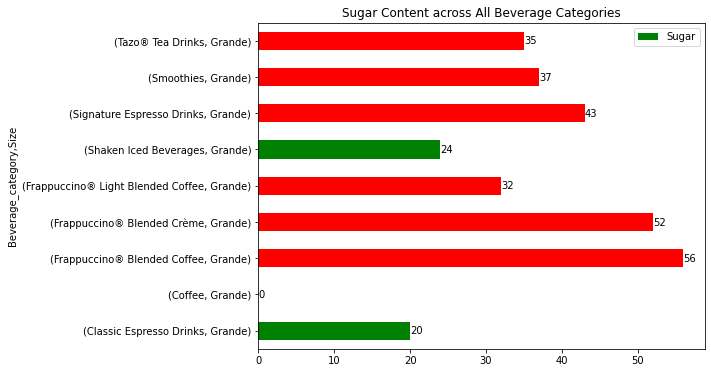

In [52]:
clrs = ['green' if x <=30 else 'red' for x in grande_renamed['Sugar'] ]
# fig = plt.figure()
ax = grande_renamed.plot.barh(y="Sugar", rot=0, color=clrs, figsize=(8,6), align="center")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Sugar Content across All Beverage Categories", fontdict=None, loc='center')
plt.savefig('sugar.jpg', dpi = 100, bbox_inches='tight') 
plt.show()

<Figure size 432x288 with 0 Axes>

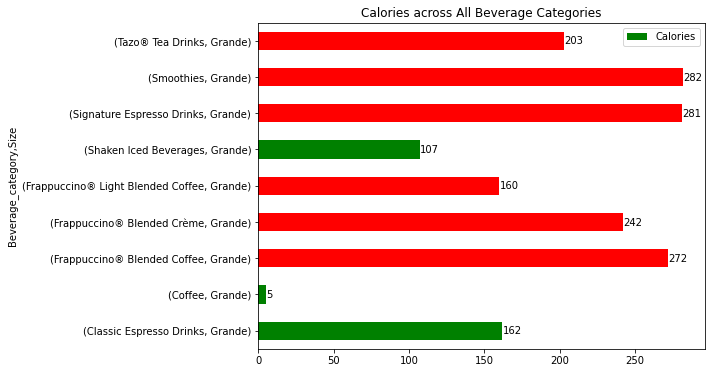

In [51]:
clrs = ['green' if x <=30 else 'red' for x in grande_renamed['Sugar'] ]
fig = plt.figure()
ax = grande_renamed.plot.barh(y="Calories", rot=0, color=clrs, figsize=(8,6), align="center")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Calories across All Beverage Categories", fontdict=None, loc='center')
plt.savefig('calories.jpg', dpi = 100, bbox_inches='tight') 

plt.show()

In [17]:
# clrs = ['grey' if x <=30 else 'red' for x in grande_renamed['Sugar'] ]
# ax = grande_renamed.plot.barh(y="Sugar", rot=0, color=clrs, figsize=(10,10), align="center")
# for container in ax.containers:
#     ax.bar_label(container)
# # fig = plt.figure()
# plt.title("Sugar Content across All Beverage Categories", fontdict=None, loc='center')
# plt.savefig('sugar.jpg') 
# plt.show()

In [18]:
#total numb sugar
total_sugar = hd[" Sugars (g)"].count()
total_sugar

242

In [19]:
average_sugar_all_drinks = hd[[' Sugars (g)', 'Size', 'Beverage_category']].groupby(['Beverage_category', 'Size']).mean()
average_sugar_all_drinks.head(3)

Sugars (g)
Beverage_category       Size               
Classic Espresso Drinks Doppio     0.000000
                        Grande    19.571429
                        Short     10.142857

In [20]:
# Calculate the percentage of Beverages with a sugar of 30 grams or greater
grande_df = hd[hd['Size'] == 'Grande']
bverage_sugar = grande_df[grande_df[" Sugars (g)"]>=30]
bverage_sugar_prcent=round(len(bverage_sugar)/len(grande_df)*100)
bverage_sugar_prcent
# 71% of Starbucks drinks of all categories of size Grande exceed daily recommended sugar amount.

71